In [16]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
#print(X.mean(axis=0))  # Should be close to 0
print(X.std(axis=0))   # Should be close to 1


std_MORT_30_AMI             0.823362
std_MORT_30_CABG            0.555459
std_MORT_30_COPD            0.936437
std_MORT_30_HF              0.989849
std_MORT_30_PN              0.987244
std_MORT_30_STK             0.856060
std_PSI_4_SURG_COMP         0.747472
std_COMP_HIP_KNEE           0.820432
std_HAI_1                   0.763486
std_HAI_2                   0.838082
std_HAI_3                   0.797187
std_HAI_4                   0.478632
std_HAI_5                   0.781492
std_HAI_6                   0.804435
std_PSI_90_SAFETY           0.994284
std_EDAC_30_AMI             0.729408
std_EDAC_30_HF              0.967498
std_EDAC_30_PN              0.957724
std_OP_32                   1.008545
std_READM_30_CABG           0.554800
std_READM_30_COPD           0.944664
std_READM_30_HIP_KNEE       0.808576
std_READM_30_HOSP_WIDE      1.118006
std_OP_35_ADM               0.710537
std_OP_35_ED                0.695569
std_OP_36                   0.855278
std_H_COMP_1_STAR_RATING    0.925087
s

# Correlation

In [29]:
import pandas as pd

# File paths
labeled_file_path = "/content/drive/My Drive/Capstone Project/SAS Star Data/Source Code/output/Step 2 Out/star_ratings_all_labeled.csv"
standardized_file_path = "/content/drive/My Drive/Capstone Project/SAS Star Data/Source Code/output/Step 0 Out/Std_data_2024Jul_analysis.csv"

# Load the labeled and standardized data
labeled_data = pd.read_csv(labeled_file_path)
standardized_data = pd.read_csv(standardized_file_path)

# Merge the labeled data with standardized data on PROVIDER_ID
merged_data = pd.merge(labeled_data, standardized_data, on="PROVIDER_ID", how="inner")

# Drop rows with missing star scores or predictors
merged_data = merged_data.dropna(subset=["star"])

# Define the target variable (star score)
y = merged_data["star"]

# Define predictors (standardized measures)
predictors = [
    'std_MORT_30_AMI', 'std_MORT_30_CABG', 'std_MORT_30_COPD', 'std_MORT_30_HF',
    'std_MORT_30_PN', 'std_MORT_30_STK', 'std_PSI_4_SURG_COMP', 'std_COMP_HIP_KNEE',
    'std_HAI_1', 'std_HAI_2', 'std_HAI_3', 'std_HAI_4', 'std_HAI_5', 'std_HAI_6',
    'std_PSI_90_SAFETY', 'std_EDAC_30_AMI', 'std_EDAC_30_HF', 'std_EDAC_30_PN',
    'std_OP_32', 'std_READM_30_CABG', 'std_READM_30_COPD', 'std_READM_30_HIP_KNEE',
    'std_READM_30_HOSP_WIDE', 'std_OP_35_ADM', 'std_OP_35_ED', 'std_OP_36',
    'std_H_COMP_1_STAR_RATING', 'std_H_COMP_2_STAR_RATING', 'std_H_COMP_3_STAR_RATING',
    'std_H_COMP_5_STAR_RATING', 'std_H_COMP_6_STAR_RATING', 'std_H_COMP_7_STAR_RATING',
    'std_H_GLOB_STAR_RATING', 'std_H_INDI_STAR_RATING', 'std_HCP_COVID_19', 'std_IMM_3',
    'std_OP_10', 'std_OP_13', 'std_OP_18B', 'std_OP_22', 'std_OP_23', 'std_OP_29',
    'std_OP_3B', 'std_OP_8', 'std_PC_01', 'std_SEP_1'
]

# Select predictors and calculate correlation with the star rating
correlation_data = merged_data[predictors + ['star']]
correlation_matrix = correlation_data.corr()

# Extract correlations with the target variable 'star'
correlation_with_star = correlation_matrix['star'].sort_values(ascending=False)

# Save correlations to CSV
correlation_output_path = "/content/drive/My Drive/Capstone Project/SAS Star Data/Source Code/Model/Output/Correlation_With_Star.csv"
correlation_with_star.to_csv(correlation_output_path)

# Display the top correlations with the star rating
print("Top correlations with star rating:")
print(correlation_with_star.head(20))


Top correlations with star rating:
star                        1.000000
std_H_GLOB_STAR_RATING      0.594255
std_H_COMP_7_STAR_RATING    0.568416
std_H_COMP_1_STAR_RATING    0.536465
std_H_COMP_6_STAR_RATING    0.501799
std_H_COMP_2_STAR_RATING    0.474956
std_H_COMP_5_STAR_RATING    0.470230
std_H_COMP_3_STAR_RATING    0.459775
std_H_INDI_STAR_RATING      0.424205
std_EDAC_30_HF              0.373888
std_MORT_30_PN              0.369507
std_EDAC_30_PN              0.351435
std_MORT_30_AMI             0.348509
std_MORT_30_CABG            0.332721
std_READM_30_HOSP_WIDE      0.328613
std_EDAC_30_AMI             0.312618
std_PSI_4_SURG_COMP         0.303292
std_MORT_30_STK             0.299444
std_PSI_90_SAFETY           0.284286
std_HAI_5                   0.276799
Name: star, dtype: float64


# ML Methods

Random Forest Feature Importances:
std_H_COMP_7_STAR_RATING    0.228008
std_MORT_30_PN              0.095661
std_H_GLOB_STAR_RATING      0.086770
std_EDAC_30_HF              0.040597
std_READM_30_HOSP_WIDE      0.040164
std_HAI_6                   0.038843
std_EDAC_30_PN              0.038733
std_MORT_30_HF              0.037935
std_PSI_90_SAFETY           0.036857
std_READM_30_COPD           0.024538
std_MORT_30_AMI             0.021092
std_MORT_30_COPD            0.018388
std_OP_32                   0.017488
std_MORT_30_STK             0.017404
std_HAI_1                   0.014311
std_COMP_HIP_KNEE           0.013429
std_SEP_1                   0.013308
std_HAI_2                   0.013025
std_PSI_4_SURG_COMP         0.012748
std_HAI_5                   0.012467
std_IMM_3                   0.012457
std_EDAC_30_AMI             0.012286
std_HAI_3                   0.011529
std_READM_30_HIP_KNEE       0.011393
std_OP_10                   0.011039
std_H_COMP_1_STAR_RATING    0.011023
std

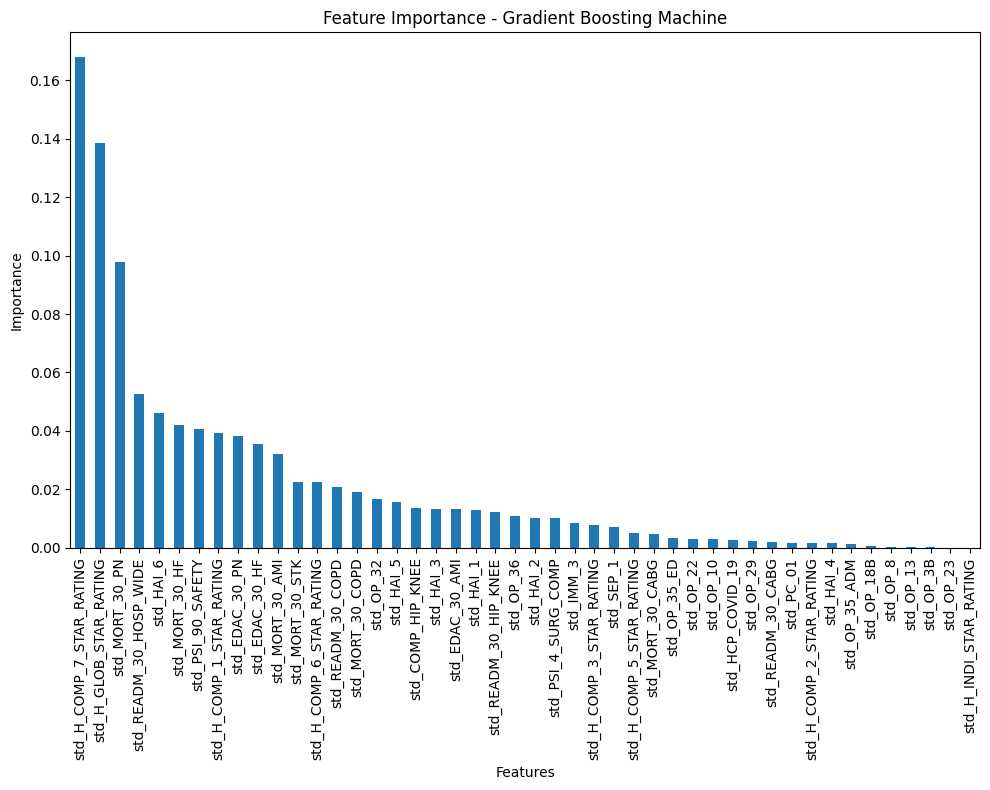

Generating SHAP Summary Plot...


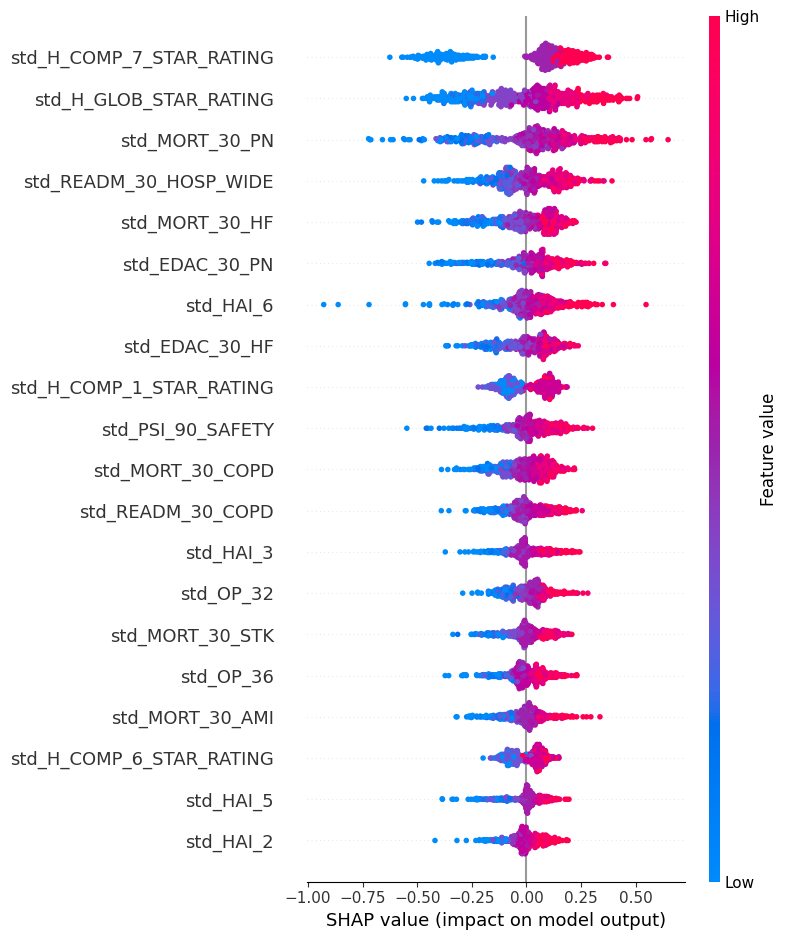

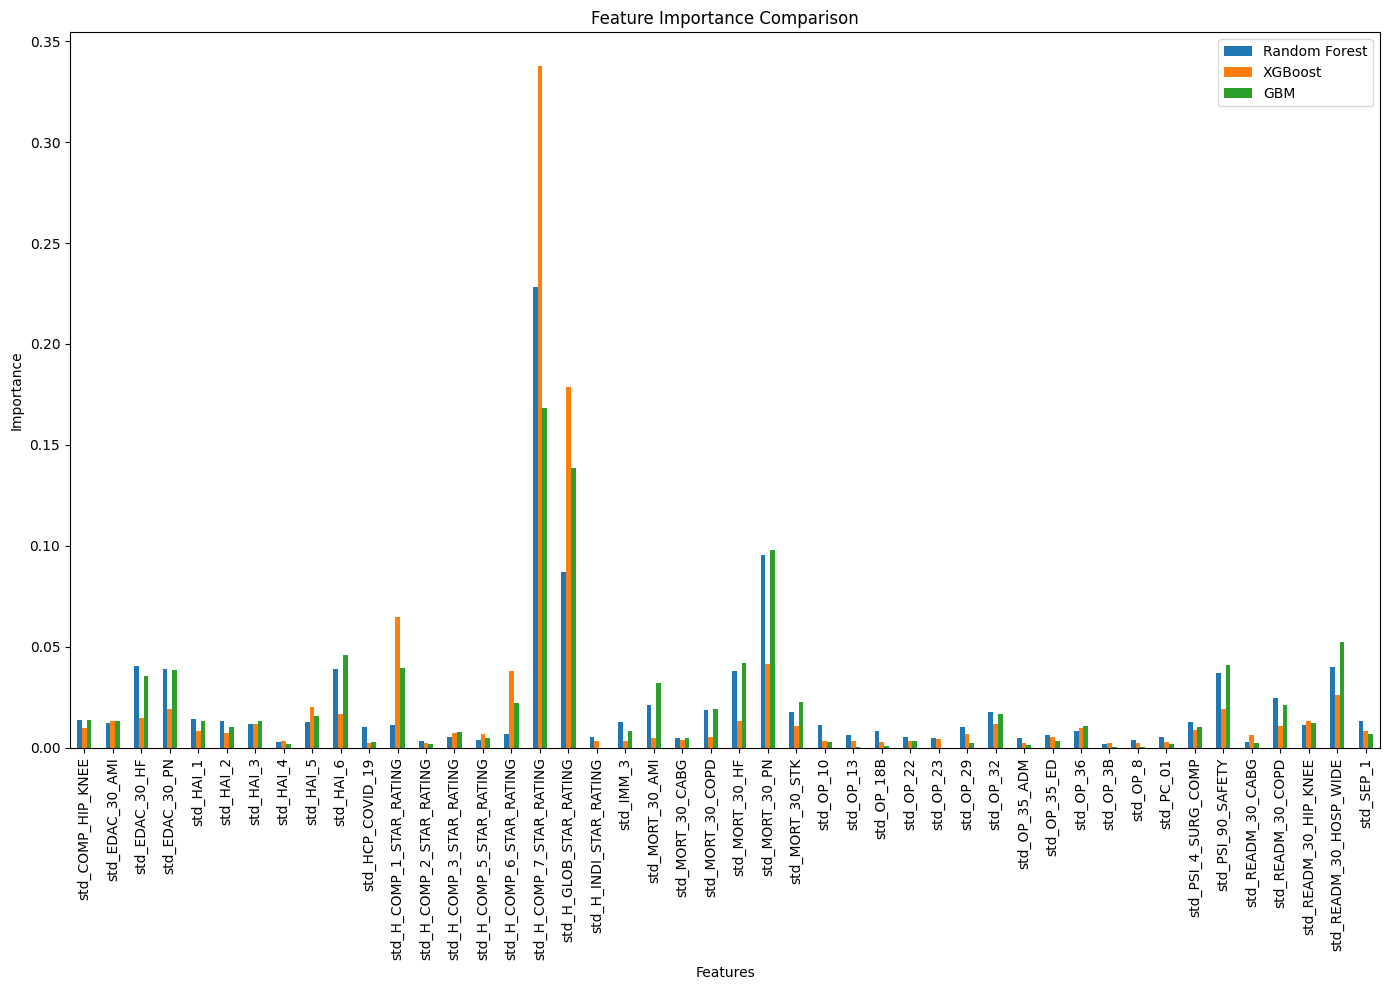

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
import shap
import matplotlib.pyplot as plt

# File paths
labeled_file_path = "/content/drive/My Drive/Capstone Project/SAS Star Data/Source Code/output/Step 2 Out/star_ratings_all_labeled.csv"
standardized_file_path = "/content/drive/My Drive/Capstone Project/SAS Star Data/Source Code/output/Step 0 Out/Std_data_2024Jul_analysis.csv"

# Load the labeled and standardized data
labeled_data = pd.read_csv(labeled_file_path)
standardized_data = pd.read_csv(standardized_file_path)

# Merge the labeled data with standardized data on PROVIDER_ID
merged_data = pd.merge(labeled_data, standardized_data, on="PROVIDER_ID", how="inner")

# Drop rows with missing star scores or predictors
merged_data = merged_data.dropna(subset=["star"])

# Define the target variable (star score)
y = merged_data["star"]

# Define predictors (standardized measures)
predictors = [
    'std_MORT_30_AMI', 'std_MORT_30_CABG', 'std_MORT_30_COPD', 'std_MORT_30_HF',
    'std_MORT_30_PN', 'std_MORT_30_STK', 'std_PSI_4_SURG_COMP', 'std_COMP_HIP_KNEE',
    'std_HAI_1', 'std_HAI_2', 'std_HAI_3', 'std_HAI_4', 'std_HAI_5', 'std_HAI_6',
    'std_PSI_90_SAFETY', 'std_EDAC_30_AMI', 'std_EDAC_30_HF', 'std_EDAC_30_PN',
    'std_OP_32', 'std_READM_30_CABG', 'std_READM_30_COPD', 'std_READM_30_HIP_KNEE',
    'std_READM_30_HOSP_WIDE', 'std_OP_35_ADM', 'std_OP_35_ED', 'std_OP_36',
    'std_H_COMP_1_STAR_RATING', 'std_H_COMP_2_STAR_RATING', 'std_H_COMP_3_STAR_RATING',
    'std_H_COMP_5_STAR_RATING', 'std_H_COMP_6_STAR_RATING', 'std_H_COMP_7_STAR_RATING',
    'std_H_GLOB_STAR_RATING', 'std_H_INDI_STAR_RATING', 'std_HCP_COVID_19', 'std_IMM_3',
    'std_OP_10', 'std_OP_13', 'std_OP_18B', 'std_OP_22', 'std_OP_23', 'std_OP_29',
    'std_OP_3B', 'std_OP_8', 'std_PC_01', 'std_SEP_1'
]
X = merged_data[predictors]

# Handle missing values in predictors
X = X.fillna(0)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ---------- Random Forest Implementation ----------
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Feature importance from Random Forest
rf_importances = pd.Series(rf.feature_importances_, index=predictors).sort_values(ascending=False)
rf_importances.to_csv("/content/drive/My Drive/Capstone Project/SAS Star Data/Source Code/Model/Output/RF_Feature_Importances.csv")
print("Random Forest Feature Importances:")
print(rf_importances)

# ---------- XGBoost Implementation ----------
xgb = XGBRegressor(n_estimators=100, random_state=42)
xgb.fit(X_train, y_train)

# Feature importance from XGBoost
xgb_importances = pd.Series(xgb.feature_importances_, index=predictors).sort_values(ascending=False)
xgb_importances.to_csv("/content/drive/My Drive/Capstone Project/SAS Star Data/Source Code/Model/Output/XGB_Feature_Importances.csv")
print("XGBoost Feature Importances:")
print(xgb_importances)

# ---------- Gradient Boosting Implementation ----------
gbm = GradientBoostingRegressor(n_estimators=100, random_state=42)
gbm.fit(X_train, y_train)

# Feature importance from GBM
gbm_importances = pd.Series(gbm.feature_importances_, index=predictors).sort_values(ascending=False)
gbm_importances.to_csv("/content/drive/My Drive/Capstone Project/SAS Star Data/Source Code/Model/Output/GBM_Feature_Importances.csv")
print("GBM Feature Importances:")
print(gbm_importances)

# Plot GBM feature importances
plt.figure(figsize=(10, 8))
gbm_importances.plot(kind="bar")
plt.title("Feature Importance - Gradient Boosting Machine")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.savefig("/content/drive/My Drive/Capstone Project/SAS Star Data/Source Code/Model/Output/GBM_Feature_Importance_Plot.png")
plt.show()

# ---------- SHAP Implementation ----------
explainer = shap.Explainer(xgb)
shap_values = explainer(X_test)

# Summary plot
print("Generating SHAP Summary Plot...")
shap.summary_plot(shap_values, X_test, feature_names=predictors)

# ---------- Visual Comparison Including GBM ----------
# Combine feature importances into one DataFrame
importance_comparison = pd.DataFrame({
    "Random Forest": rf_importances,
    "XGBoost": xgb_importances,
    "GBM": gbm_importances
}).fillna(0)

# Save comparison for review
importance_comparison.to_csv("/content/drive/My Drive/Capstone Project/SAS Star Data/Source Code/Model/Output/Feature_Importance_Comparison.csv")

# Plot comparison
importance_comparison.plot(kind="bar", figsize=(14, 10))
plt.title("Feature Importance Comparison")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.legend(loc="best")
plt.tight_layout()
plt.savefig("/content/drive/My Drive/Capstone Project/SAS Star Data/Source Code/Model/Output/Feature_Importance_Comparison_With_GBM.png")
plt.show()
